In [11]:
###IMPORTS FOR USUAL TKINTER + SOUND FOR METRONOME
from tkinter import *
import tkinter as tk
import tkinter.ttk as ttk
# from pygame import mixer

###IMPORTS FOR RECORDING
from tkinter import messagebox
import sounddevice as sd
import queue
import soundfile as sf
import threading

## EXPLANATION OF WHERE OUTPUT IS PUT FOR TKINTER.
# Root is permanent. If this is destroyed, code will be terminated.
# Window is in the middle of the two. It is used as the canvas for shapes.
# Frames can be destroyed whenever and more widgets (buttons, entry inputs)
# can be added into the space and destroyed too, as long as it is in the frame.

# There are two ways to create things: .pack() and .grid_layout()
# I chose .pack() because I understood it far quicker than the grid
# and it seems easy to use.
# Packing or Grid Layout tells the widget that it actually is in the space.


root = tk.Tk()

root.geometry("1300x700")


# Creating the frame where everything will be.
frame = Frame(root)
frame.pack()

# These are all the widgets for the first page.
label1 = tk.Label(frame, text="Recording voice", font=('helvetica', 14))
label1.pack(pady=10)

label2 = tk.Label(frame, text="Enter your BPM:", font=('helvetica', 10))
label2.pack(pady=10)

entry1 = tk.Entry(frame)
entry1.focus_set()
entry1.pack(pady=10)

label3 = tk.Label(frame, text="BPM entered is an integer value between 40 and 300.", font=('helvetica', 8))
label3.pack(pady=10)

label4 = tk.Label(frame, text=":)", font=('helvetica', 8))
label4.pack(pady=10)


# This is kept in as a reminder that, although was a main part of the major draft of this programme, it eventually was not needed.
# mixer.init()
# mixer.music.load("C:\$$$AUDIO FILES\metronome_click_3.wav")


###MAIN BODY OF CODE

# Getting the BPM
bpm_input = None

def get_input_bpm():
    global bpm_input
    input_bpm = entry1.get()
    flag = False
    try:
        input_bpm = int(input_bpm)
        flag = True

    except:
        label4.config(text="You must input an INTEGER BPM in range 40 - 300.")

    if flag == True:
        if 40<=input_bpm<=300:
            label4.config(text="BPM accepted.")
            bpm_input = input_bpm
            button1.config(text="Continue", command=lambda: del_frame())

        else:
            label4.config(text="You must input an integer BPM in RANGE of 40 - 300.")

    
button1 = tk.Button(frame, text="Enter", command=get_input_bpm, bg="brown", fg="white", font=("helvetica", 9, "bold"))
button1.pack(pady=10)



# Destroying previous frame to get rid of all old widgets
def del_frame():
    frame.destroy()
    button_to_start()


# Making new frame again to put in new button.
frame1 = None
button2 = None
def button_to_start():
    global frame1
    global button2
    frame1 = Frame(root)
    frame1.pack()
    button2 = tk.Button(frame1, text="START METRONOME AND RECORDING", command=lambda: create_window(), bg="brown", fg="white", font=("helvetica", 9, "bold"))
    button2.pack(pady=10)

# 
window = None
def create_window():
    global window
    window = tk.Canvas(root, width=1300, height=700, bg="white")
    # These numbers are through trial and error to make sure area is as big as limits of the screen without asking the code to go full screen.
    # I do not want the code to go full screen because it is then hard to exit the output Tkinter screen (without using the Alt+Tab method to switch
    # between tabs because the exit X disappears from the output window).
    window.pack()
    threading_rec(1)



###THIS IS THE BEGINNING OF THE RECORDING AUDIO SEQUENCE
    
q = queue.Queue()
# Create a queue to contain audio data. First bit of data in goes out first.
recording = False
file_exists = False

# Fit data into queue.
def callback(indata, frames, time, status):
    q.put(indata.copy())

# Functions to record and stop recording audio.
# The recording is done as a thread to prevent it being the main process.
def threading_rec(x):
    if x == 1:
        # If recording is selected, then the thread is activated
        t1=threading.Thread(target= record_audio)
        blinking_dot()
        t1.start()
    elif x == 2:
        # To stop, set the flag to false
        global recording
        recording = False
        messagebox.showinfo(message="Recording finished")
        stop_blinking_dot()

# This is to get the input stream into a file.
def record_audio():
    global recording
    recording = True
    global file_exists

    messagebox.showinfo(message="Recording Audio. Sing into the microphone.")

    with sf.SoundFile("C:\$$$AUDIO FILES\MY_OWN.wav", mode='w', samplerate=44100,
                      channels=2) as file:
        # Create an input stream to record audio without a preset time.
        with sd.InputStream(samplerate=44100, channels=2, callback=callback):
            while recording == True:
                # Set variable to True to allow playing audio later
                file_exists = True
                # Writing into file
                file.write(q.get())  

###FLICKERING CIRCLE METRONOME

def blinking_dot(i=0):
    global button2
    button2.config(text="STOP RECORDING", command=lambda: threading_rec(2))
    colors = ("white", "red")
    window.create_oval(600,300,700,400,fill=colors[i])
    # window.create_oval(x0,y0,x1,y1,fill=color)
    
    # mixer.music.play()
    # I realised, after v1 where you could hear the metronome, that this was a bad idea
    # because you could still hear the metronome in the recording, which would affect the MIDI output when analysed.
    
    root.after(int((60/bpm_input)*1000), blinking_dot, 1-i)

    

##frame3 = None
def stop_blinking_dot():
    button2.destroy()
    window.destroy()
    root.destroy() # To delete later when everything else works -- this is just to end programme.
##    global fram3
##    frame3 = Frame(root)
##    frame3.pack()

get_input_bpm()

root.mainloop()

['F5', 77, 0.15, 0.0052236495898467725, 100]
['G4', 67, 0.4300000000000002, 0.0052236495898467725, 100]
['F4', 65, 0.3000000000000001, 0.0052236495898467725, 100]
['Fs1/Gb4', 66, 0.23000000000000007, 0.0052236495898467725, 100]
['C4', 60, 0.7800000000000005, 0.0052236495898467725, 100]
['F4', 65, 1.2100000000000009, 0.0052236495898467725, 100]
['Fs1/Gb4', 66, 0.21000000000000005, 0.0052236495898467725, 100]
['Fs1/Gb5', 78, 0.35000000000000014, 0.0052236495898467725, 100]
['F5', 77, 0.6000000000000003, 0.0052236495898467725, 100]
['D5', 74, 0.7400000000000004, 0.0052236495898467725, 100]
['Cs1/Db5', 73, 0.8500000000000005, 0.0052236495898467725, 100]
['A5', 81, 0.4000000000000002, 0.0052236495898467725, 100]
['G5', 79, 0.48000000000000026, 0.0052236495898467725, 100]
['D5', 74, 0.22000000000000006, 0.0052236495898467725, 100]
['G4', 67, 0.3000000000000001, 0.0052236495898467725, 100]
['G5', 79, 0.25000000000000006, 0.0052236495898467725, 100]
['F5', 77, 0.8600000000000005, 0.00522364958

C:\Users\BERKES~1\AppData\Local\Temp/ipykernel_28036/3160783703.py:294: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  librosa.display.specshow(piano_roll, sr=rate, x_axis='time', y_axis='cqt_note', fmin=100,fmax = 440)


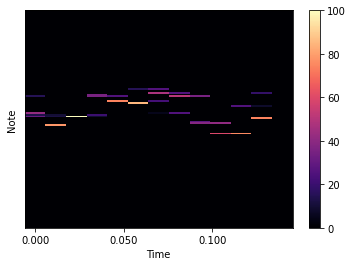

In [12]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
import numpy as np
import math

from scipy.fft import rfft, rfftfreq

from midiutil import MIDIFile
import pretty_midi
import librosa
import mir_eval.display
import librosa.display

# in_wav = "C:\$$$AUDIO FILES\VOICE_C4_Scale.wav"
in_wav = "C:\$$$AUDIO FILES\MY_OWN.wav"
# in_wav = "C:\$$$AUDIO FILES\VOICE_C4_Scale_3.wav"


### ------------------------------------------------------------------------------------------------------------------- ###
### STEP ONE: GET RID OF ONE CHANNEL IF ORIGINAL RECORDING HAS TWO SO EASIER TO DEAL WITH + NORMALISE FILE 
rate, data = wavfile.read(in_wav)

normalised_tone = np.int16((data[:]/data[:].max()) * 32767)

### ------------------------------------------------------------------------------------------------------------------- ###
### STEP TWO: Simple function which takes MIDI value and turns it into note names.
def midi_to_note_name(midi_value):
    possible_tones = [['A0', 21], ['As0/Bb0', 22], ['B0', 23], ['C1', 24], ['Cs1/Db1', 25], ['D1', 26], ['Ds1/Eb1', 27], ['E1', 28], ['F1', 29], ['Fs1/Gb1', 30], ['G1', 31], ['Gs1/Ab1', 32], ['A1', 33], ['As1/Bb1', 34], ['B1', 35], ['C2', 36], ['Cs1/Db2', 37], ['D2', 38], ['Ds1/Eb2', 39], ['E2', 40], ['F2', 41], ['Fs1/Gb2', 42], ['G2', 43], ['Gs1/Ab2', 44], ['A2', 45], ['As1/Bb2', 46], ['B2', 47], ['C3', 48], ['Cs1/Db3', 49], ['D3', 50], ['Ds1/Eb3', 51], ['E3', 52], ['F3', 53], ['Fs1/Gb3', 54], ['G3', 55], ['Gs1/Ab3', 56], ['A3', 57], ['As1/Bb3', 58], ['B3', 59], ['C4', 60], ['Cs1/Db4', 61], ['D4', 62], ['Ds1/Eb4', 63], ['E4', 64], ['F4', 65], ['Fs1/Gb4', 66], ['G4', 67], ['Gs1/Ab4', 68], ['A4', 69], ['As1/Bb4', 70], ['B4', 71], ['C5', 72], ['Cs1/Db5', 73], ['D5', 74], ['Ds1/Eb5', 75], ['E5', 76], ['F5', 77], ['Fs1/Gb5', 78], ['G5', 79], ['Gs1/Ab5', 80], ['A5', 81], ['As1/Bb5', 82], ['B5', 83], ['C6', 84], ['Cs1/Db6', 85], ['D6', 86], ['Ds1/Eb6', 87], ['E6', 88], ['F6', 89], ['Fs1/Gb6', 90], ['G6', 91], ['Gs1/Ab6', 92], ['A6', 93], ['As1/Bb6', 94], ['B6', 95], ['C7', 96], ['Cs1/Db7', 97], ['D7', 98], ['Ds1/Eb7', 99], ['E7', 100], ['F7', 101], ['Fs1/Gb7', 102], ['G7', 103], ['Gs1/Ab7', 104], ['A7', 105], ['As1/Bb7', 106], ['B7', 107], ['C8', 108]]
    midi_note_name = 0
    for tone in range(0,len(possible_tones)):
            if possible_tones[tone][1] == midi_value:
                midi_note_name = possible_tones[tone][0]
                return(midi_note_name)



### ------------------------------------------------------------------------------------------------------------------- ###
### STEP FOUR: Force silences -- I still want to keep this because, even though not necessary, it is still good to have.
###            this also gets rid of silences at beginning and end
normalised_tone_prep_silence = []
normalised_tone_edited = []

if data.ndim == 1:
    for i in range (len(normalised_tone)):
        normalised_tone_edited.append(normalised_tone[i])
else:
    for i in range (len(normalised_tone)):
        normalised_tone_edited.append(normalised_tone[i][0])

        
for i in range (data.shape[0]):
    if abs(normalised_tone_edited[i]) < 1000:
        normalised_tone_prep_silence.append(0)
    else:
        normalised_tone_prep_silence.append(normalised_tone_edited[i])

idx = 0
while normalised_tone_prep_silence[idx]==0:
    idx = idx + 1
start_track = idx
idx = len(normalised_tone_prep_silence) - 1
while normalised_tone_prep_silence[idx] == 0:
    idx = idx - 1
end_track = idx # This filters out sound at end of track.

### ---------------------------------------------------------------------------------------------------- ###
### STEP FIVE: This function returns the MIDI of the six sample data points

def multiple_midi_from_sample(data, begin_sample, length_sample_points):
    
    end_sample = begin_sample + length_sample_points
    data_of_sample = data[begin_sample: end_sample]
    normalised_tone = data_of_sample

    num_points_freq = end_sample - begin_sample

    
    yf = rfft(normalised_tone) #Rapid Fourier transformation on Normalized Tone - returns Aplitude for each frequency
    xf = rfftfreq(num_points_freq, 1 / rate)
    k = min(len(xf),len(yf))
    # This is just to make sure both data sets are the same length -- really confusingly, sometimes yf is shorter than xf.

    xf = xf[:k]
    yf = yf[:k]
    # plt.plot(xf, np.abs(yf))
    # plt.xlabel("Frequencies in the Wave Sample in Hz")
    # plt.ylabel("FFT Amplitude of given Frequency")
    # plt.xlim([0,4000]) #plot frequency from 0 to 4000 Hz
    # plt.show()
    # The maximum detectable frequency is half the sample rate (44100 sample rate can determine frequency up to 22kHz (ie. maximum hearing range)

    power_a = 0
    point_a = 0
    power_b = 0
    point_b = 0
    power_c = 0
    point_c = 0
    power_d = 0
    point_d = 0
    power_e = 0
    point_e = 0
    power_f = 0
    point_f = 0
    

    for i in range(len(xf)):
        # EXPLANATION OF IF STATEMENTS:
        # if current power > highest power:
            # highest power = current power
            # where maximum point is
            
        if yf[i] > power_a:
            power_a = yf[i]
            point_a = i
        elif yf[i] > power_b:
            power_b = yf[i]
            point_b = i
        elif yf[i] > power_c:
            power_c = yf[i]
            point_c = i
        elif yf[i] > power_d:
            power_d = yf[i]
            point_d = i
        elif yf[i] > power_e:
            power_e = yf[i]
            point_e = i
        elif yf[i] > power_f:
            power_f = yf[i]
            point_f = i

    freq_a = xf[point_a]
    freq_b = xf[point_b]
    freq_c = xf[point_c]
    freq_d = xf[point_d]
    freq_e = xf[point_e]
    freq_f = xf[point_f]

    midi_freq_a = 0 # set this to 0 in case the frequency is not greater than 0.
    midi_freq_b = 0
    midi_freq_c = 0
    midi_freq_d = 0
    midi_freq_e = 0
    midi_freq_f = 0
    
    if freq_a > 10: #minimum must be at leats 10 Hz
        midi_freq_a =  int(round((12*math.log2(freq_a/440) + 69),0))
        # This is a one-line function to get Frequency to MIDI.
        # I honestly do not know how this works, but it does!!!
    if freq_b > 10: #minimum must be at leats 10 Hz
        midi_freq_b =  int(round((12*math.log2(freq_b/440) + 69),0))
    if freq_c > 10: #minimum must be at leats 10 Hz
        midi_freq_c =  int(round((12*math.log2(freq_c/440) + 69),0))
    if freq_d > 10: #minimum must be at leats 10 Hz
        midi_freq_d =  int(round((12*math.log2(freq_d/440) + 69),0))
    if freq_e > 10: #minimum must be at leats 10 Hz
        midi_freq_e =  int(round((12*math.log2(freq_e/440) + 69),0))
    if freq_f > 10: #minimum must be at leats 10 Hz
        midi_freq_f =  int(round((12*math.log2(freq_f/440) + 69),0))
        

    return (midi_freq_a,midi_freq_b,midi_freq_c,midi_freq_d,midi_freq_e,midi_freq_f)
    # It is ok for this to be returned as a tuple as I will not be editing it.
### ---------------------------------------------------------------------------------------------------- ###
### STEP SIX: Analysing top six tones of 0.01s samples, finding minimum MIDI and putting length of notes in.

bpm = 60
points_to_run_analysis = int(rate/100)
# rate = 44100 (usually) / 100 
# This is because each 441 points is 0.01s, thus this tells us how many samples are going to be formed

midi_sound_a = [] # This is the output file for MIDI notes
midi_sound_b = []
midi_sound_c = []
midi_sound_d = []
midi_sound_e = []


for begin_sample in range(0,len(normalised_tone_prep_silence),points_to_run_analysis):
    # begin_sample is the beginning point of the sample to be taken.
    midi_tone = multiple_midi_from_sample(normalised_tone_prep_silence, begin_sample, int(60/bpm*rate))
    # midi_tone is a tuple of the top six most powerful MIDI tones.
    # int(60/bpm*rate) = how many data points should be in sample, i.e. what number should be added to begin_sample.

    midi_sound_a.append(midi_tone) # All top 6 power MIDI values of samples are all appended to midi_sound_a.


# This finds out the minimum MIDI value of top six most powerful MIDI tones.
for i in range(len(midi_sound_a)):
    min_midi = 108 # This is the top value of MIDI we can possibly have. Everything else will be lower.
    for j in range(6):
        if midi_sound_a[i][j] < min_midi:
            min_midi = midi_sound_a[i][j]
    midi_sound_b.append(min_midi) # All min MIDI value of each sample in midi_sound_b.


 
# Trying to select minimum MIDI value in 0.03s interval -- to further get rid of rogue harmonics.
width_of_search = 15 # Width of search for minimum MIDI.
for i in range (len(midi_sound_b)):
    if i < width_of_search:
        midi_sound_c.append(min(midi_sound_b[:width_of_search]))
    elif width_of_search <= i < len(midi_sound_b) - width_of_search:        
        midi_sound_c.append(min(midi_sound_b[(i - width_of_search):(i + width_of_search)]))
    elif i >= len(midi_sound_b) - width_of_search:
        midi_sound_c.append(min(midi_sound_b[(len(midi_sound_b) - width_of_search):]))

# Now checking if sample is the same as a previous sample and joining these together to create one note.
# While these sampes may be distinct notes even though they are of the same pitch, this code cannot tell.
# Therefore, I need to think of a good way to circumvent this.
counter_midi_sound_d = 0
midi_sound_d.append([midi_sound_c[0],0.01]) # Append MIDI note and sample length

for i in range(1,len(midi_sound_c)):
    if midi_sound_c[i] == midi_sound_d[-1][0]:
        midi_sound_d[-1][1] += 0.01
    else:
        midi_sound_d.append([midi_sound_c[i],0.01])


final_bpm = 60/(len(normalised_tone_prep_silence)/ len(midi_sound_d))
midi_sound_d_final = []

# This checks the notes are longer than a required length.
for tone in midi_sound_d:
    if tone[0] > 0 and tone[1] > 0.1:
        # The tone has to be longer than 0.1.
        # For context, 300bpm is 0.2s per beat, so the note being longer than 0.1 is generous
        # because the notes have to be within the realm of possibility of singing.
        midi_sound_d_final.append([midi_to_note_name(tone[0]), tone[0], tone[1],final_bpm, 100]) # 100 is maximum volume.
    else:
        if len(midi_sound_d_final) > 0:
            if tone[0] == midi_sound_d_final[-1][1]:
                midi_sound_d_final[-1][2] += tone[1]
                # i.e. If note is too short, add time of current note to the previous note if MIDI is the same.


for tone in midi_sound_d_final:
    print(tone)

# Forcing the notes to bpm = 60/ whatever bpm it is given. This will get rid of rogue very short notes which might have been sung by accident.
for i in range (len(midi_sound_d_final)):
    duration_of_tone = midi_sound_d_final[i][2]
    # if (0.35*(60/bpm) <= duration_of_tone <= (1.5*(60/bpm))) and (midi_sound_d_final[i][1] > 20):
    if (duration_of_tone >= 0.35*(60/bpm) and (midi_sound_d_final[i][1] > 20)):
        #1.5 or 0.35 are important factors for note duration; M = 20 is minimum midi tone
        duration_of_tone = 60/bpm # force 1 beat time
        midi_sound_e.append([midi_to_note_name(midi_sound_d_final[i][1]), midi_sound_d_final[i][1], duration_of_tone , bpm, 100])

print("-----")
for i in range (len(midi_sound_e)):
    print(midi_sound_e[i])

print("-----")

def midi_to_file(degrees, BPM,outmidi):
    # Degrees = MIDI note number
    # Each instrument synth has a programme number e.g. Cello = 42

    # Open Midi file
    my_MIDI = MIDIFile(1) # One track, defaults to format 1 (tempo track  automatically created)
    # First define the Track of Midi - we are using only one Track
    track    = 0
    time     = 0   # In beats
    tempo    = BPM  # In BPM
    my_MIDI.addTempo(track,time, tempo)

    channel  = 0
    
    for note in degrees:
        pitch = note[1]
        duration = note[2] # In seconds
        duration = duration/(60/BPM) # in BPM
        volume = note[4] # Volume is also often called velocity
        my_MIDI.addNote(track, channel, pitch, time, duration, volume)
        time = time + duration # Before it was 1
    with open(outmidi, "wb") as output_file:
        my_MIDI.writeFile(output_file)



midi_sound_d_final_use = []
for note in midi_sound_d:
    midi_sound_d_final_use.append(midi_sound_d[i][1])


out_midi = in_wav[:len(in_wav)-4]+"out_midi.mid"
midi_to_file(midi_sound_d_final, bpm, out_midi)


def printmidifile(out_midi, rate):
    midi_data = pretty_midi.PrettyMIDI(out_midi)
    piano_roll = midi_data.get_piano_roll(times=midi_data.get_beats())
    plt.figure()
    librosa.display.specshow(piano_roll, sr=rate, x_axis='time', y_axis='cqt_note', fmin=100,fmax = 440)
    plt.colorbar()
    plt.show()

printmidifile(out_midi, rate)